In [ ]:
#CMSC 254 Machine Learning
#Paulius Tolocka

1st HW

In [143]:
#Lopas
# python
import numpy as np
np.random.seed(0)
N_fold = 10
N_test = 500
N_train = 1000
N = N_test + N_train
# Specify feature dimensions of X and Y
X_dim = 50
Y_dim = 10
X = np.random.randn(N, X_dim)
# Only have 3 non - zero entries in W,
nnz = 3
W = np.zeros((X_dim * Y_dim))
nnz_idx = np.random.choice(X_dim * Y_dim, nnz, replace = False)
W[nnz_idx] = np.random.randn(nnz) * 2
W = W.reshape (X_dim, Y_dim)
Y = X @ W + np.random.rand (N, Y_dim )
# Split training and testing set
X_test = X[:N_test]
Y_test = Y[:N_test]
X_train = X[N_test:]
Y_train = Y[N_test:]

Write a function to fit the Ridge regression on the training data and calculate the MSE on the training set. Choosing λ from 0 to 10 (with a step size of 0.2), compute the estimate ˆy for different values λ, and plot the MSE as a function of λ. You may use the sklearn.linear model module (i.e. for model fitting and making predictions).

In [144]:
from sklearn.linear_model import Ridge
import numpy as np

def ridgereg(lamda,x,y,x1,y1,type):

    clf = Ridge(alpha=lamda)
    clf.fit(x, y)


    if type == 1:
        Y_pred = clf.predict(x)
        MSE = np.square(np.subtract(y,Y_pred)).mean()
    else:
        Y_pred = clf.predict(x1)
        MSE = np.square(np.subtract(y1,Y_pred)).mean()
    return Y_pred, MSE
    

In [145]:
#Getting the MSEs

lamdas = np.arange(0.0, 10.2, 0.2)
y_hats = []
MSEs = []
for i in lamdas:
    y_hat, MSE = ridgereg(i,X_train,Y_train,X_test,Y_test,1)
    y_hats.append(y_hat)
    MSEs.append(MSE)


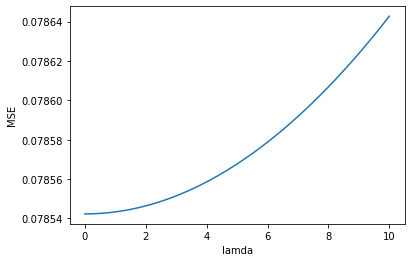

In [146]:
#Plotting
import matplotlib.pyplot as plt

x = lamdas = np.arange(0.0, 10.2, 0.2)
len(MSEs)

plt.plot(x, MSEs)
plt.xlabel('lamda')
plt.ylabel('MSE')
plt.show()

Implement 10-fold cross validation on the training set to select λ. Plot and compare the MSE on the hold-out set with the true MSE which is computed on the test set. And see how we get to finding the “best” λ.
(Note: For this subproblem, you should write your own function for cross validation; in particular, you should not call the existing sklearn.model selection module.)

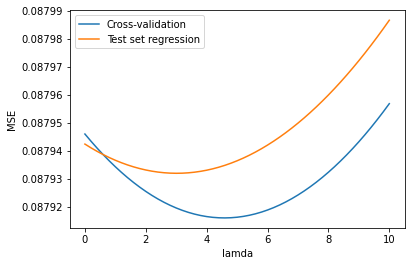

3.0
4.6000000000000005


In [223]:
from statistics import mean
from functools import reduce

#Help with the list of lists
def flatten(t):
    return [item for sublist in t for item in sublist]

# Split data into 10 folds
# Choose one fold, fit with the data in K-1 folds. Do it for all K folds.
# Average the error for each model.

def kfold(k,l, X, Y,f):
    diffs = []
    for i in range(k):
        xp = np.array_split(X, k)
        yp = np.array_split(Y, k)

        x_test = xp.pop(i)
        y_test = yp.pop(i)
        x_train = flatten(xp)
        y_train = flatten(yp)
    
        y_hat, diff = ridgereg(l,x_train,y_train,x_test,y_test,f)
        diffs.append(diff)

    return mean(diffs)



#Calculate the cross-val
k = 10
lamdas = np.arange(0.0, 10.2, 0.2)
MSEs = []
min_l = 0
min_mse = 999
for i in lamdas:
    ll = kfold(k, i, X_train, Y_train, 2)
    if (ll < min_mse):
        min_mse = ll
        min_l = i
    MSEs.append(ll)

#calculate the true
min_ll = 0
min_mse = 999
MSEsT = []
for i in lamdas:
    lll = ridgereg(i,X_train,Y_train,X_test,Y_test,2)[1]
    if (lll < min_mse):
        min_mse = lll
        min_ll = i
    MSEsT.append(lll)

plt.plot(lamdas, MSEs, label="Cross-validation")
plt.plot(lamdas, MSEsT, label="Test set regression")
plt.xlabel('lamda')
plt.ylabel('MSE')
plt.legend()
plt.show()

# The lambda that minimises the value
print(min_ll)
print(min_l)

As we see the MSE of cross-validation is lower, as we increase lambda, which is a good thing, meaning it is helping us make better predictions. In addition, the true one minimizes it at 3.0 and cross-validation minimizes at lambda 4.6. Looks as expected, goes down intially and gets worse as lambda increases.